In [1]:
%matplotlib inline

In [2]:
# Dependencies to import.
import numpy as np
import pandas as pd
import scipy.stats as states
import scipy.stats as st
import math
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from datetime import datetime
from scipy.stats import sem

In [3]:
# Load in CSV Files
AllStates_df = pd.read_csv("/Users/azpunit/Desktop/Project-1/CSV Files/ALLSTATES.csv")
AllStates_df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,7/22/2020,2/1/2020,7/11/2020,United States,All,Under 1 year,11.0,8072.0,75.0,2.0,14.0,98.0,NaN
1,7/22/2020,2/1/2020,7/11/2020,United States,All,1-4 years,9.0,1547.0,52.0,2.0,41.0,100.0,NaN
2,7/22/2020,2/1/2020,7/11/2020,United States,All,5-14 years,16.0,2379.0,78.0,5.0,49.0,138.0,NaN
3,7/22/2020,2/1/2020,7/11/2020,United States,All,15-24 years,190.0,14810.0,300.0,62.0,51.0,475.0,NaN
4,7/22/2020,2/1/2020,7/11/2020,United States,All,25-34 years,935.0,30885.0,1113.0,416.0,149.0,1768.0,NaN


In [4]:
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
# Replace Nan with blank space
Clean_US_df = AllStates_df.replace(np.nan, '', regex=True)
Clean_US_df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,7/22/2020,2/1/2020,7/11/2020,United States,All,Under 1 year,11,8072,75,2,14,98,
1,7/22/2020,2/1/2020,7/11/2020,United States,All,1-4 years,9,1547,52,2,41,100,
2,7/22/2020,2/1/2020,7/11/2020,United States,All,5-14 years,16,2379,78,5,49,138,
3,7/22/2020,2/1/2020,7/11/2020,United States,All,15-24 years,190,14810,300,62,51,475,
4,7/22/2020,2/1/2020,7/11/2020,United States,All,25-34 years,935,30885,1113,416,149,1768,


In [5]:
# Drop footnote column
cols = ['Footnote', 'Pneumonia Deaths', 'Influenza Deaths']
Clean_US_df.drop(columns=cols,inplace=True)
Clean_US_df

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,7/22/2020,2/1/2020,7/11/2020,United States,All,Under 1 year,11,8072,2,98
1,7/22/2020,2/1/2020,7/11/2020,United States,All,1-4 years,9,1547,2,100
2,7/22/2020,2/1/2020,7/11/2020,United States,All,5-14 years,16,2379,5,138
3,7/22/2020,2/1/2020,7/11/2020,United States,All,15-24 years,190,14810,62,475
4,7/22/2020,2/1/2020,7/11/2020,United States,All,25-34 years,935,30885,416,1768
...,...,...,...,...,...,...,...,...,...,...
1411,7/22/2020,2/1/2020,7/11/2020,Puerto Rico,Female,75-84 years,0,0,0,0
1412,7/22/2020,2/1/2020,7/11/2020,Puerto Rico,Female,85 years and over,0,0,0,0
1413,7/22/2020,2/1/2020,7/11/2020,Puerto Rico,Female,All ages,,434,,52
1414,7/22/2020,2/1/2020,7/11/2020,Puerto Rico,Unknown,All ages,0,,0,0


In [6]:
# Drop the data for sex that includes males and females
to_drop = ['All ages', 'All Ages']
Clean2_US_df = Clean_US_df[~Clean_US_df['Age group'].isin(to_drop)]
Clean2_US_df

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,7/22/2020,2/1/2020,7/11/2020,United States,All,Under 1 year,11,8072,2,98
1,7/22/2020,2/1/2020,7/11/2020,United States,All,1-4 years,9,1547,2,100
2,7/22/2020,2/1/2020,7/11/2020,United States,All,5-14 years,16,2379,5,138
3,7/22/2020,2/1/2020,7/11/2020,United States,All,15-24 years,190,14810,62,475
4,7/22/2020,2/1/2020,7/11/2020,United States,All,25-34 years,935,30885,416,1768
...,...,...,...,...,...,...,...,...,...,...
1408,7/22/2020,2/1/2020,7/11/2020,Puerto Rico,Female,45-54 years,,229,,34
1409,7/22/2020,2/1/2020,7/11/2020,Puerto Rico,Female,55-64 years,0,0,0,0
1410,7/22/2020,2/1/2020,7/11/2020,Puerto Rico,Female,65-74 years,0,0,0,0
1411,7/22/2020,2/1/2020,7/11/2020,Puerto Rico,Female,75-84 years,0,0,0,0


In [7]:
# Check data type
Clean2_US_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Data as of                                1199 non-null   object
 1   Start week                                1199 non-null   object
 2   End Week                                  1199 non-null   object
 3   State                                     1199 non-null   object
 4   Sex                                       1199 non-null   object
 5   Age group                                 1199 non-null   object
 6   COVID-19 Deaths                           1199 non-null   object
 7   Total Deaths                              1199 non-null   object
 8   Pneumonia and COVID-19 Deaths             1199 non-null   object
 9   Pneumonia, Influenza, or COVID-19 Deaths  1199 non-null   object
dtypes: object(10)
memory usage: 103.0+ KB


In [8]:
# Change date Type
Clean2_US_df = Clean2_US_df.astype({'Data as of':'datetime64'})
Clean2_US_df = Clean2_US_df.astype({'Start week':'datetime64'})
Clean2_US_df = Clean2_US_df.astype({'End Week':'datetime64'})
Clean2_US_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data as of                                1199 non-null   datetime64[ns]
 1   Start week                                1199 non-null   datetime64[ns]
 2   End Week                                  1199 non-null   datetime64[ns]
 3   State                                     1199 non-null   object        
 4   Sex                                       1199 non-null   object        
 5   Age group                                 1199 non-null   object        
 6   COVID-19 Deaths                           1199 non-null   object        
 7   Total Deaths                              1199 non-null   object        
 8   Pneumonia and COVID-19 Deaths             1199 non-null   object        
 9   Pneumonia, Influenza, or COVID

In [9]:
# Change date Type
Clean2_US_df['COVID-19 Deaths'] = pd.to_numeric(Clean2_US_df['COVID-19 Deaths'],errors='coerce') 
Clean2_US_df['Total Deaths'] = pd.to_numeric(Clean2_US_df['Total Deaths'],errors='coerce') 
Clean2_US_df['Pneumonia and COVID-19 Deaths'] = pd.to_numeric(Clean2_US_df['Pneumonia and COVID-19 Deaths'],errors='coerce') 
Clean2_US_df['Pneumonia, Influenza, or COVID-19 Deaths'] = pd.to_numeric(Clean2_US_df['Pneumonia, Influenza, or COVID-19 Deaths'],errors='coerce')
Clean2_US_df

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,2020-07-22,2020-02-01,2020-07-11,United States,All,Under 1 year,11.0,8072.0,2.0,98.0
1,2020-07-22,2020-02-01,2020-07-11,United States,All,1-4 years,9.0,1547.0,2.0,100.0
2,2020-07-22,2020-02-01,2020-07-11,United States,All,5-14 years,16.0,2379.0,5.0,138.0
3,2020-07-22,2020-02-01,2020-07-11,United States,All,15-24 years,190.0,14810.0,62.0,475.0
4,2020-07-22,2020-02-01,2020-07-11,United States,All,25-34 years,935.0,30885.0,416.0,1768.0
...,...,...,...,...,...,...,...,...,...,...
1408,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,45-54 years,NaN,229.0,NaN,34.0
1409,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0
1410,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0
1411,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0


In [10]:
# Add three columns
sum_column1 = Clean2_US_df["COVID-19 Deaths"] + Clean2_US_df["Pneumonia and COVID-19 Deaths"]
Clean2_US_df["COVID-19 & Pneumonia and COVID-19 Deaths"] = sum_column1
sum_column2 = Clean2_US_df["COVID-19 Deaths"] + Clean2_US_df["Pneumonia, Influenza, or COVID-19 Deaths"]
Clean2_US_df["COVID-19 & Pneumonia, Influenza, or COVID-19 Deaths"] = sum_column2
sum_column3 = Clean2_US_df["COVID-19 Deaths"] + Clean2_US_df["Pneumonia and COVID-19 Deaths"]+ Clean2_US_df["Pneumonia, Influenza, or COVID-19 Deaths"]
Clean2_US_df["COVID-19 & Pneumonia and COVID-19 Deaths & Pneumonia, Influenza, or COVID-19 Deaths"] = sum_column3
Clean2_US_df

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",COVID-19 & Pneumonia and COVID-19 Deaths,"COVID-19 & Pneumonia, Influenza, or COVID-19 Deaths","COVID-19 & Pneumonia and COVID-19 Deaths & Pneumonia, Influenza, or COVID-19 Deaths"
0,2020-07-22,2020-02-01,2020-07-11,United States,All,Under 1 year,11.0,8072.0,2.0,98.0,13.0,109.0,111.0
1,2020-07-22,2020-02-01,2020-07-11,United States,All,1-4 years,9.0,1547.0,2.0,100.0,11.0,109.0,111.0
2,2020-07-22,2020-02-01,2020-07-11,United States,All,5-14 years,16.0,2379.0,5.0,138.0,21.0,154.0,159.0
3,2020-07-22,2020-02-01,2020-07-11,United States,All,15-24 years,190.0,14810.0,62.0,475.0,252.0,665.0,727.0
4,2020-07-22,2020-02-01,2020-07-11,United States,All,25-34 years,935.0,30885.0,416.0,1768.0,1351.0,2703.0,3119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,45-54 years,NaN,229.0,NaN,34.0,NaN,NaN,NaN
1409,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1411,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
# Replace Nan with blank space
Clean3_US_df = Clean2_US_df.replace(np.nan, '', regex=True)
Clean3_US_df

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",COVID-19 & Pneumonia and COVID-19 Deaths,"COVID-19 & Pneumonia, Influenza, or COVID-19 Deaths","COVID-19 & Pneumonia and COVID-19 Deaths & Pneumonia, Influenza, or COVID-19 Deaths"
0,2020-07-22,2020-02-01,2020-07-11,United States,All,Under 1 year,11,8072,2,98,13,109,111
1,2020-07-22,2020-02-01,2020-07-11,United States,All,1-4 years,9,1547,2,100,11,109,111
2,2020-07-22,2020-02-01,2020-07-11,United States,All,5-14 years,16,2379,5,138,21,154,159
3,2020-07-22,2020-02-01,2020-07-11,United States,All,15-24 years,190,14810,62,475,252,665,727
4,2020-07-22,2020-02-01,2020-07-11,United States,All,25-34 years,935,30885,416,1768,1351,2703,3119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,45-54 years,,229,,34,,,
1409,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,55-64 years,0,0,0,0,0,0,0
1410,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,65-74 years,0,0,0,0,0,0,0
1411,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,75-84 years,0,0,0,0,0,0,0


In [12]:
# Move Total Deaths Column
TD1 = Clean3_US_df['Total Deaths']
Clean3_US_df.drop(labels=['Total Deaths'], axis=1,inplace = True)
Clean3_US_df.insert(12, 'Total Deaths', TD1)
Clean3_US_df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Pneumonia and COVID-19 Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",COVID-19 & Pneumonia and COVID-19 Deaths,"COVID-19 & Pneumonia, Influenza, or COVID-19 Deaths","COVID-19 & Pneumonia and COVID-19 Deaths & Pneumonia, Influenza, or COVID-19 Deaths",Total Deaths
0,2020-07-22,2020-02-01,2020-07-11,United States,All,Under 1 year,11,2,98,13,109,111,8072
1,2020-07-22,2020-02-01,2020-07-11,United States,All,1-4 years,9,2,100,11,109,111,1547
2,2020-07-22,2020-02-01,2020-07-11,United States,All,5-14 years,16,5,138,21,154,159,2379
3,2020-07-22,2020-02-01,2020-07-11,United States,All,15-24 years,190,62,475,252,665,727,14810
4,2020-07-22,2020-02-01,2020-07-11,United States,All,25-34 years,935,416,1768,1351,2703,3119,30885


In [13]:
# Rename columns
Clean3_US_df = Clean3_US_df.rename(columns = {"Data as of":"Data_as_of"})
Clean3_US_df = Clean3_US_df.rename(columns = {"Start week":"Start_Week"})
Clean3_US_df = Clean3_US_df.rename(columns = {"End Week":"End_Week"})
Clean3_US_df = Clean3_US_df.rename(columns = {"Age group":"Age_Group"})
Clean3_US_df = Clean3_US_df.rename(columns = {"COVID-19 Deaths":"COVID19_Deaths"})
Clean3_US_df = Clean3_US_df.rename(columns = {"Pneumonia and COVID-19 Deaths":"Pneumonia_and_COVID19_Deaths"})
Clean3_US_df = Clean3_US_df.rename(columns = {"Pneumonia, Influenza, or COVID-19 Deaths":"Pneumonia_Influenza_or_COVID19_Deaths"})
Clean3_US_df = Clean3_US_df.rename(columns = {"COVID-19 & Pneumonia and COVID-19 Deaths":"COVID19_&_Pneumonia_and_COVID19_Deaths"})
Clean3_US_df = Clean3_US_df.rename(columns = {"COVID-19 & Pneumonia, Influenza, or COVID-19 Deaths":"COVID19_&_Pneumonia_Influenza_or_COVID19_Deaths"})
Clean3_US_df = Clean3_US_df.rename(columns = {"COVID-19 & Pneumonia and COVID-19 Deaths & Pneumonia, Influenza, or COVID-19 Deaths":"COVID19_&_Pneumonia_and_COVID19_Deaths_&_Pneumonia_Influenza_or_COVID19 Deaths"})
Clean3_US_df = Clean3_US_df.rename(columns = {"Total Deaths":"Total_Deaths"})
Clean3_US_df

,Data_as_of,Start_Week,End_Week,State,Sex,Age_Group,COVID19_Deaths,Pneumonia_and_COVID19_Deaths,Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths,COVID19_&_Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths_&_Pneumonia_Influenza_or_COVID19 Deaths,Total_Deaths
0,2020-07-22,2020-02-01,2020-07-11,United States,All,Under 1 year,11,2,98,13,109,111,8072
1,2020-07-22,2020-02-01,2020-07-11,United States,All,1-4 years,9,2,100,11,109,111,1547
2,2020-07-22,2020-02-01,2020-07-11,United States,All,5-14 years,16,5,138,21,154,159,2379
3,2020-07-22,2020-02-01,2020-07-11,United States,All,15-24 years,190,62,475,252,665,727,14810
4,2020-07-22,2020-02-01,2020-07-11,United States,All,25-34 years,935,416,1768,1351,2703,3119,30885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,45-54 years,,,34,,,,229
1409,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,55-64 years,0,0,0,0,0,0,0
1410,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,65-74 years,0,0,0,0,0,0,0
1411,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,75-84 years,0,0,0,0,0,0,0


In [14]:
# Replace Age Groups
Clean3_US_df['Age_Group'].replace(['Under 1 year','1-4 years','5-14 years',
                                   '15-24 years','25-34 years','35-44 years','45-54 years'],'0-54 years',inplace=True)
Clean3_US_df['Age_Group'].replace(['65-74 years','75-84 years','85 years and over'],'65 years and older',inplace=True)
Clean3_US_df

,Data_as_of,Start_Week,End_Week,State,Sex,Age_Group,COVID19_Deaths,Pneumonia_and_COVID19_Deaths,Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths,COVID19_&_Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths_&_Pneumonia_Influenza_or_COVID19 Deaths,Total_Deaths
0,2020-07-22,2020-02-01,2020-07-11,United States,All,0-54 years,11,2,98,13,109,111,8072
1,2020-07-22,2020-02-01,2020-07-11,United States,All,0-54 years,9,2,100,11,109,111,1547
2,2020-07-22,2020-02-01,2020-07-11,United States,All,0-54 years,16,5,138,21,154,159,2379
3,2020-07-22,2020-02-01,2020-07-11,United States,All,0-54 years,190,62,475,252,665,727,14810
4,2020-07-22,2020-02-01,2020-07-11,United States,All,0-54 years,935,416,1768,1351,2703,3119,30885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,0-54 years,,,34,,,,229
1409,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,55-64 years,0,0,0,0,0,0,0
1410,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,65 years and older,0,0,0,0,0,0,0
1411,2020-07-22,2020-02-01,2020-07-11,Puerto Rico,Female,65 years and older,0,0,0,0,0,0,0


In [15]:
# Delete
# Get indexes where name column has value Puerto Rico, New York City, United States 
indexNames1 = Clean3_US_df[Clean3_US_df['State'] == 'United States'].index
 
# Delete these row indexes from dataFrame
Clean3_US_df.drop(indexNames1 , inplace=True)

indexNames2 = Clean3_US_df[Clean3_US_df['State'] == 'New York City'].index
 
# Delete these row indexes from dataFrame
Clean3_US_df.drop(indexNames2 , inplace=True)

indexNames3 = Clean3_US_df[Clean3_US_df['State'] == 'Puerto Rico'].index
 
# Delete these row indexes from dataFrame
Clean3_US_df.drop(indexNames3 , inplace=True)
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
# Replace Nan with blank space
Clean4_US_df = Clean3_US_df.replace(np.nan, '', regex=True)
Clean4_US_df

,Data_as_of,Start_Week,End_Week,State,Sex,Age_Group,COVID19_Deaths,Pneumonia_and_COVID19_Deaths,Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths,COVID19_&_Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths_&_Pneumonia_Influenza_or_COVID19 Deaths,Total_Deaths
38,2020-07-22,2020-02-01,2020-07-11,Alabama,Male,0-54 years,0,0,,0,,,83
39,2020-07-22,2020-02-01,2020-07-11,Alabama,Male,0-54 years,0,0,0,0,0,0,19
40,2020-07-22,2020-02-01,2020-07-11,Alabama,Male,0-54 years,0,0,,0,,,34
41,2020-07-22,2020-02-01,2020-07-11,Alabama,Male,0-54 years,0,0,,0,,,224
42,2020-07-22,2020-02-01,2020-07-11,Alabama,Male,0-54 years,,,17,,,,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,2020-07-22,2020-02-01,2020-07-11,Wyoming,Female,0-54 years,,0,,,,,50
1383,2020-07-22,2020-02-01,2020-07-11,Wyoming,Female,55-64 years,0,0,,0,,,102
1384,2020-07-22,2020-02-01,2020-07-11,Wyoming,Female,65 years and older,,,13,,,,168
1385,2020-07-22,2020-02-01,2020-07-11,Wyoming,Female,65 years and older,,0,27,,,,256


In [16]:
# Delete Sex Column
coldelete = ['Sex']
Clean4_US_df.drop(columns=coldelete,inplace=True)
Clean4_US_df

,Data_as_of,Start_Week,End_Week,State,Age_Group,COVID19_Deaths,Pneumonia_and_COVID19_Deaths,Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths,COVID19_&_Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths_&_Pneumonia_Influenza_or_COVID19 Deaths,Total_Deaths
38,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,0,0,,0,,,83
39,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,0,0,0,0,0,0,19
40,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,0,0,,0,,,34
41,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,0,0,,0,,,224
42,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,,,17,,,,384
...,...,...,...,...,...,...,...,...,...,...,...,...
1382,2020-07-22,2020-02-01,2020-07-11,Wyoming,0-54 years,,0,,,,,50
1383,2020-07-22,2020-02-01,2020-07-11,Wyoming,55-64 years,0,0,,0,,,102
1384,2020-07-22,2020-02-01,2020-07-11,Wyoming,65 years and older,,,13,,,,168
1385,2020-07-22,2020-02-01,2020-07-11,Wyoming,65 years and older,,0,27,,,,256


In [17]:
Clean4_US_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 38 to 1386
Data columns (total 12 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   Data_as_of                                                                      1122 non-null   datetime64[ns]
 1   Start_Week                                                                      1122 non-null   datetime64[ns]
 2   End_Week                                                                        1122 non-null   datetime64[ns]
 3   State                                                                           1122 non-null   object        
 4   Age_Group                                                                       1122 non-null   object        
 5   COVID19_Deaths                                                             

In [18]:
# Change date Type
Clean4_US_df['COVID19_Deaths'] = pd.to_numeric(Clean3_US_df['COVID19_Deaths'],errors='coerce') 
Clean4_US_df['Total_Deaths'] = pd.to_numeric(Clean3_US_df['Total_Deaths'],errors='coerce') 
Clean4_US_df['Pneumonia_and_COVID19_Deaths'] = pd.to_numeric(Clean3_US_df['Pneumonia_and_COVID19_Deaths'],errors='coerce') 
Clean4_US_df['Pneumonia_Influenza_or_COVID19_Deaths'] = pd.to_numeric(Clean3_US_df['Pneumonia_Influenza_or_COVID19_Deaths'],errors='coerce')
Clean4_US_df['COVID19_&_Pneumonia_and_COVID19_Deaths'] = pd.to_numeric(Clean3_US_df['COVID19_&_Pneumonia_and_COVID19_Deaths'],errors='coerce') 
Clean4_US_df['COVID19_&_Pneumonia_Influenza_or_COVID19_Deaths'] = pd.to_numeric(Clean3_US_df['COVID19_&_Pneumonia_Influenza_or_COVID19_Deaths'],errors='coerce') 
Clean4_US_df['COVID19_&_Pneumonia_and_COVID19_Deaths_&_Pneumonia_Influenza_or_COVID19 Deaths'] = pd.to_numeric(Clean3_US_df['COVID19_&_Pneumonia_and_COVID19_Deaths_&_Pneumonia_Influenza_or_COVID19 Deaths'],errors='coerce') 
Clean4_US_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 38 to 1386
Data columns (total 12 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   Data_as_of                                                                      1122 non-null   datetime64[ns]
 1   Start_Week                                                                      1122 non-null   datetime64[ns]
 2   End_Week                                                                        1122 non-null   datetime64[ns]
 3   State                                                                           1122 non-null   object        
 4   Age_Group                                                                       1122 non-null   object        
 5   COVID19_Deaths                                                             

In [19]:
# Count
Clean4_US_df.State.value_counts()

California              22
Oregon                  22
Massachusetts           22
Michigan                22
Kansas                  22
South Carolina          22
Colorado                22
New Hampshire           22
Nebraska                22
Texas                   22
New Mexico              22
Virginia                22
New Jersey              22
Indiana                 22
Minnesota               22
Washington              22
North Dakota            22
Kentucky                22
Maryland                22
Tennessee               22
Rhode Island            22
Montana                 22
Hawaii                  22
Illinois                22
Mississippi             22
Iowa                    22
Delaware                22
District of Columbia    22
Alaska                  22
New York                22
Georgia                 22
Wisconsin               22
South Dakota            22
Ohio                    22
North Carolina          22
Wyoming                 22
Utah                    22
L

In [20]:
# Boxplot
Clean4_US_df.head()

,Data_as_of,Start_Week,End_Week,State,Age_Group,COVID19_Deaths,Pneumonia_and_COVID19_Deaths,Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths,COVID19_&_Pneumonia_Influenza_or_COVID19_Deaths,COVID19_&_Pneumonia_and_COVID19_Deaths_&_Pneumonia_Influenza_or_COVID19 Deaths,Total_Deaths
38,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,0.0,0.0,NaN,0.0,NaN,NaN,83.0
39,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,0.0,0.0,0.0,0.0,0.0,0.0,19.0
40,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,0.0,0.0,NaN,0.0,NaN,NaN,34.0
41,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,0.0,0.0,NaN,0.0,NaN,NaN,224.0
42,2020-07-22,2020-02-01,2020-07-11,Alabama,0-54 years,NaN,NaN,17.0,NaN,NaN,NaN,384.0


In [21]:
calculationTD = Clean4_US_df.groupby(['State','Age_Group']).Total_Deaths.mean()
calculationTD

State      Age_Group         
Alabama    0-54 years             260.714286
           55-64 years           1948.500000
           65 years and older    3050.666667
Alaska     0-54 years              43.125000
           55-64 years            162.000000
                                    ...     
Wisconsin  55-64 years           1598.500000
           65 years and older    3395.333333
Wyoming    0-54 years              35.625000
           55-64 years            143.500000
           65 years and older     268.833333
Name: Total_Deaths, Length: 153, dtype: float64

In [22]:
calculation1 = Clean4_US_df.groupby(['State','Age_Group']).COVID19_Deaths.mean()
calculation1

State      Age_Group         
Alabama    0-54 years              9.272727
           55-64 years            90.500000
           65 years and older    160.166667
Alaska     0-54 years              0.000000
           55-64 years             0.000000
                                    ...    
Wisconsin  55-64 years            52.500000
           65 years and older    109.000000
Wyoming    0-54 years              0.000000
           55-64 years             0.000000
           65 years and older           NaN
Name: COVID19_Deaths, Length: 153, dtype: float64

In [23]:
calculation1.index

MultiIndex([(      'Alabama',         '0-54 years'),
            (      'Alabama',        '55-64 years'),
            (      'Alabama', '65 years and older'),
            (       'Alaska',         '0-54 years'),
            (       'Alaska',        '55-64 years'),
            (       'Alaska', '65 years and older'),
            (      'Arizona',         '0-54 years'),
            (      'Arizona',        '55-64 years'),
            (      'Arizona', '65 years and older'),
            (     'Arkansas',         '0-54 years'),
            ...
            (   'Washington', '65 years and older'),
            ('West Virginia',         '0-54 years'),
            ('West Virginia',        '55-64 years'),
            ('West Virginia', '65 years and older'),
            (    'Wisconsin',         '0-54 years'),
            (    'Wisconsin',        '55-64 years'),
            (    'Wisconsin', '65 years and older'),
            (      'Wyoming',         '0-54 years'),
            (      'Wyoming', 

In [24]:
California_df=calculation1.loc['California']
California_df = pd.DataFrame(California_df)
California_df

,COVID19_Deaths
Age_Group,
0-54 years,60.666667
55-64 years,472.000000
65 years and older,902.833333


In [25]:
Virginia_df=calculation1.loc['Virginia']
Virginia_df = pd.DataFrame(Virginia_df)
Virginia_df

,COVID19_Deaths
Age_Group,
0-54 years,10.727273
55-64 years,110.000000
65 years and older,287.333333


In [26]:
Florida_df=calculation1.loc['Florida']
Florida_df = pd.DataFrame(Florida_df)
Florida_df

,COVID19_Deaths
Age_Group,
0-54 years,28.363636
55-64 years,214.000000
65 years and older,598.500000


In [27]:
Georgia_df=calculation1.loc['Georgia']
Georgia_df = pd.DataFrame(Georgia_df)
Georgia_df

,COVID19_Deaths
Age_Group,
0-54 years,22.200000
55-64 years,166.500000
65 years and older,329.833333


In [28]:
Connecticut_df=calculation1.loc['Connecticut']
Connecticut_df = pd.DataFrame(Connecticut_df)
Connecticut_df

,COVID19_Deaths
Age_Group,
0-54 years,12.333333
55-64 years,161.000000
65 years and older,595.666667


In [29]:
# Add column to each dataframe
California_final_df= California_df['State']="California"
California_final_df

'California'

In [30]:
California_df.head()

,COVID19_Deaths,State
Age_Group,,
0-54 years,60.666667,California
55-64 years,472.000000,California
65 years and older,902.833333,California


In [31]:
# Add column to each dataframe
Virginia_final_df= Virginia_df['State']="Virginia"
Virginia_final_df

'Virginia'

In [32]:
# Add column to each dataframe
Florida_final_df= Florida_df['State']="Florida"
Florida_final_df

'Florida'

In [33]:
# Add column to each dataframe
Connecticut_final_df= Connecticut_df['State']="Connecticut"
Connecticut_final_df

'Connecticut'

In [34]:
# Add column to each dataframe
Georgia_final_df= Georgia_df['State']="Georgia"
Georgia_final_df

'Georgia'

In [35]:
# Create empty list to fill with tumor vol data (for plotting)
COVID19_MEAN=[]
COVID19_MEAN.append(California_df['COVID19_Deaths'])
COVID19_MEAN.append(Florida_df['COVID19_Deaths'])
COVID19_MEAN.append(Georgia_df['COVID19_Deaths'])
COVID19_MEAN.append(Virginia_df['COVID19_Deaths'])
COVID19_MEAN.append(Connecticut_df['COVID19_Deaths'])
COVID19_MEAN

[Age_Group
 0-54 years             60.666667
 55-64 years           472.000000
 65 years and older    902.833333
 Name: COVID19_Deaths, dtype: float64,
 Age_Group
 0-54 years             28.363636
 55-64 years           214.000000
 65 years and older    598.500000
 Name: COVID19_Deaths, dtype: float64,
 Age_Group
 0-54 years             22.200000
 55-64 years           166.500000
 65 years and older    329.833333
 Name: COVID19_Deaths, dtype: float64,
 Age_Group
 0-54 years             10.727273
 55-64 years           110.000000
 65 years and older    287.333333
 Name: COVID19_Deaths, dtype: float64,
 Age_Group
 0-54 years             12.333333
 55-64 years           161.000000
 65 years and older    595.666667
 Name: COVID19_Deaths, dtype: float64]

In [36]:
COVID19_MEAN

[Age_Group
 0-54 years             60.666667
 55-64 years           472.000000
 65 years and older    902.833333
 Name: COVID19_Deaths, dtype: float64,
 Age_Group
 0-54 years             28.363636
 55-64 years           214.000000
 65 years and older    598.500000
 Name: COVID19_Deaths, dtype: float64,
 Age_Group
 0-54 years             22.200000
 55-64 years           166.500000
 65 years and older    329.833333
 Name: COVID19_Deaths, dtype: float64,
 Age_Group
 0-54 years             10.727273
 55-64 years           110.000000
 65 years and older    287.333333
 Name: COVID19_Deaths, dtype: float64,
 Age_Group
 0-54 years             12.333333
 55-64 years           161.000000
 65 years and older    595.666667
 Name: COVID19_Deaths, dtype: float64]

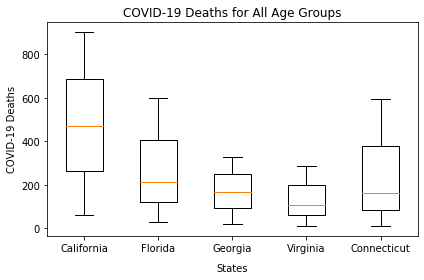

In [37]:
State_List = ['California','Florida','Georgia','Virginia', 'Connecticut']

fig1, ax1 = plt.subplots()
ax1.set_title('COVID-19 Deaths for All Age Groups')
ax1.set_xticklabels(State_List)
plt.xlabel('States', labelpad=10)
plt.ylabel('COVID-19 Deaths')
ax1.boxplot(COVID19_MEAN)
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/All States Box Plot.png")
plt.show()

In [38]:
# Statistics
tableTD = pd.pivot_table(Clean4_US_df, values=['Total_Deaths'], index=['State'], columns=['Age_Group'],aggfunc=np.sum).reset_index()
tableTD

State Total_Deaths                               
Age_Group                         0-54 years 55-64 years 65 years and older
0                       Alabama       3650.0      3897.0            18304.0
1                        Alaska        345.0       324.0             1175.0
2                       Arizona       4617.0      4180.0            24905.0
3                      Arkansas       2174.0      2250.0            11081.0
4                    California      17550.0     17062.0           101709.0
5                      Colorado       3183.0      2625.0            15102.0
6                   Connecticut       1428.0      1671.0            13287.0
7                      Delaware        510.0       570.0             3729.0
8          District of Columbia        646.0       611.0             2222.0
9                       Florida      12833.0     12951.0            80636.0
10                      Georgia       5796.0      6222.0            29728.0
11                       Hawaii        590.0       666.0             4162.0
12                        Idaho        786.0       805.0             5208.0
13                     Illinois       7259.0      7792.0            44270.0
14                      Indiana       4004.0      4532.0            25291.0
15                         Iowa       1323.0      1717.0            11580.0
16                       Kansas       1479.0      1597.0             9553.0
17                     Kentucky       3160.0      3428.0            15499.0
18                    Louisiana       3336.0      3543.0            17254.0
19                        Maine        742.0       870.0             5493.0
20                     Maryland       3673.0      3801.0            20825.0
21                Massachusetts       3235.0      3684.0            28702.0
22                     Michigan       6011.0      6752.0            39321.0
23                    Minnesota       2242.0      2486.0            17874.0
24                  Mississippi       2433.0      2506.0            11615.0
25                     Missouri       3773.0      4106.0            22609.0
26                      Montana        550.0       581.0             3613.0
27                     Nebraska        824.0       967.0             6149.0
28                       Nevada       1782.0      1831.0             9211.0
29                New Hampshire        643.0       713.0             4959.0
30                   New Jersey       5255.0      6067.0            40241.0
31                   New Mexico       1452.0      1170.0             6432.0
32                     New York       5765.0      6889.0            47914.0
33               North Carolina       5055.0      4801.0            26896.0
34                 North Dakota        414.0       371.0             2511.0
35                         Ohio       7630.0      7589.0            43221.0
36                     Oklahoma       2365.0      2604.0            12924.0
37                       Oregon       1875.0      2028.0            13273.0
38                 Pennsylvania       7041.0      7600.0            51459.0
39                 Rhode Island        455.0       602.0             4378.0
40               South Carolina       3716.0      3670.0            18118.0
41                 South Dakota        399.0       466.0             2879.0
42                    Tennessee       5755.0      5467.0            24828.0
43                        Texas      15161.0     14449.0            70745.0
44                         Utah       1470.0      1071.0             6932.0
45                      Vermont        257.0       315.0             2228.0
46                     Virginia       4372.0      4557.0            25931.0
47                   Washington       3365.0      3327.0            20643.0
48                West Virginia       1163.0      1195.0             6307.0
49                    Wisconsin       2918.0      3197.0            20372.0
50                      Wyoming        285.0       287.0             1613.

In [39]:
tableTD.describe()

Total_Deaths                                 
Age_Group    0-54 years   55-64 years 65 years and older
count         51.000000     51.000000          51.000000
mean        3465.588235   3577.686275       20684.529412
std         3623.731862   3595.911253       20933.933367
min          257.000000    287.000000        1175.000000
25%          805.000000    918.500000        5821.000000
50%         2433.000000   2604.000000       15102.000000
75%         4494.500000   4544.500000       25611.000000
max        17550.000000  17062.000000      101709.000000

In [40]:
tableTD.median()

              Age_Group         
Total_Deaths  0-54 years             2433.0
              55-64 years            2604.0
              65 years and older    15102.0
dtype: float64

In [41]:
tableTD.var()

              Age_Group         
Total_Deaths  0-54 years            1.313143e+07
              55-64 years           1.293058e+07
              65 years and older    4.382296e+08
dtype: float64

In [42]:
tableTD.sem()

              Age_Group         
Total_Deaths  0-54 years             507.423956
              55-64 years            503.528291
              65 years and older    2931.336997
dtype: float64

In [43]:
# Statistics
table1 = pd.pivot_table(Clean4_US_df, values=['COVID19_Deaths'], index=['State'], columns=['Age_Group'],aggfunc=np.sum).reset_index()
table1

State COVID19_Deaths                               
Age_Group                           0-54 years 55-64 years 65 years and older
0                       Alabama          102.0       181.0              961.0
1                        Alaska            0.0         0.0                0.0
2                       Arizona          271.0       350.0             1809.0
3                      Arkansas           17.0        57.0              258.0
4                    California          728.0       944.0             5417.0
5                      Colorado           87.0       156.0             1380.0
6                   Connecticut          111.0       322.0             3574.0
7                      Delaware           25.0        49.0              429.0
8          District of Columbia           76.0       108.0              449.0
9                       Florida          312.0       428.0             3591.0
10                      Georgia          222.0       333.0             1979.0
11                       Hawaii            0.0         0.0                0.0
12                        Idaho            0.0         0.0              107.0
13                     Illinois          603.0       859.0             5175.0
14                      Indiana          109.0       265.0             2345.0
15                         Iowa           24.0       104.0              634.0
16                       Kansas           14.0        49.0              239.0
17                     Kentucky           25.0        67.0              552.0
18                    Louisiana          261.0       427.0             2394.0
19                        Maine            0.0         0.0              107.0
20                     Maryland          285.0       440.0             2882.0
21                Massachusetts          210.0       517.0             7014.0
22                     Michigan          439.0       690.0             4459.0
23                    Minnesota           36.0       115.0             1318.0
24                  Mississippi          119.0       187.0              887.0
25                     Missouri           36.0       103.0              862.0
26                      Montana            0.0         0.0                0.0
27                     Nebraska           14.0        45.0              211.0
28                       Nevada           58.0        76.0              433.0
29                New Hampshire            0.0        14.0              353.0
30                   New Jersey         1107.0      1758.0            10941.0
31                   New Mexico           68.0        69.0              365.0
32                     New York          736.0      1327.0             9175.0
33               North Carolina           87.0       126.0              992.0
34                 North Dakota            0.0        11.0               80.0
35                         Ohio          104.0       270.0             2312.0
36                     Oklahoma            0.0        57.0              341.0
37                       Oregon            0.0        19.0              213.0
38                 Pennsylvania          294.0       653.0             6269.0
39                 Rhode Island            0.0        67.0              845.0
40               South Carolina           53.0       133.0              771.0
41                 South Dakota            0.0        17.0               51.0
42                    Tennessee           49.0        99.0              508.0
43                        Texas          478.0       609.0             2606.0
44                         Utah            0.0        27.0              156.0
45                      Vermont            0.0         0.0               26.0
46                     Virginia          118.0       220.0             1724.0
47                   Washington           63.0       123.0             1037.0
48                West Virginia            0.0         0.0               93.0
49                    Wisconsin           51.0  

In [44]:
table1.describe()

COVID19_Deaths                                
Age_Group     0-54 years  55-64 years 65 years and older
count          51.000000    51.000000          51.000000
mean          144.941176   246.588235        1744.666667
std           229.337168   353.560245        2419.657436
min             0.000000     0.000000           0.000000
25%             0.000000    36.000000         226.000000
50%            53.000000   105.000000         771.000000
75%           164.500000   327.500000        2328.500000
max          1107.000000  1758.000000       10941.000000

In [45]:
table1.median()

                Age_Group         
COVID19_Deaths  0-54 years             53.0
                55-64 years           105.0
                65 years and older    771.0
dtype: float64

In [46]:
table1.var()

                Age_Group         
COVID19_Deaths  0-54 years            5.259554e+04
                55-64 years           1.250048e+05
                65 years and older    5.854742e+06
dtype: float64

In [47]:
table1.sem()

                Age_Group         
COVID19_Deaths  0-54 years             32.113627
                55-64 years            49.508337
                65 years and older    338.819812
dtype: float64

In [48]:
# Compute the Pearson correlation coefficient between "COVID-19 Deaths" and "Total Deaths"
COVID19Deaths = table1.iloc[:,1]
TotalDeath = tableTD.iloc[:,1]
correlation = states.pearsonr(COVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 0-54 years is {round(correlation[0],2)}")

The correlation between both factors for age group from 0-54 years is 0.66


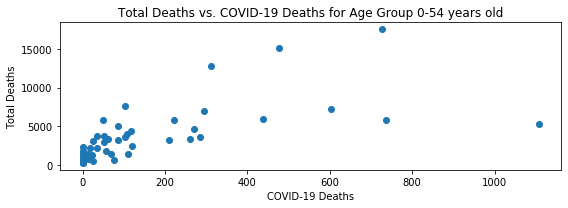

In [49]:
# Scatter COVID-19 Deaths and Total Deaths per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table1.iloc[:,1],tableTD.iloc[:,1])
plt.title("Total Deaths vs. COVID-19 Deaths for Age Group 0-54 years old")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs COVID-19 Deaths Scatter Plot 1.png")
plt.show()

In [50]:
# Compute the Pearson correlation coefficient between "COVID-19 Deaths" and "Total Deaths"
COVID19Deaths = table1.iloc[:,2]
TotalDeath = tableTD.iloc[:,2]
correlation = st.pearsonr(COVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 55-64 years is {round(correlation[0],2)}")

The correlation between both factors for age group from 55-64 years is 0.64


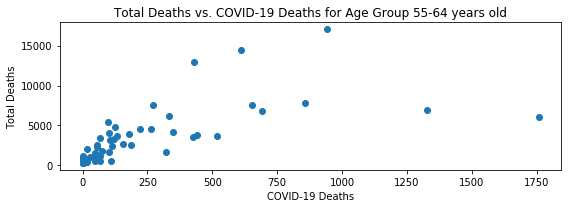

In [51]:
# Scatter COVID-19 Deaths and Total Deaths per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table1.iloc[:,2],tableTD.iloc[:,2])
plt.title("Total Deaths vs. COVID-19 Deaths for Age Group 55-64 years old")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs COVID-19 Deaths Scatter Plot 2.png")
plt.show()

In [52]:
# Compute the Pearson correlation coefficient between "COVID-19 Deaths" and "Total Deaths"
COVID19Deaths = table1.iloc[:,3]
TotalDeath = tableTD.iloc[:,3]
correlation = st.pearsonr(COVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 65 years and older is {round(correlation[0],2)}")

The correlation between both factors for age group from 65 years and older is 0.66


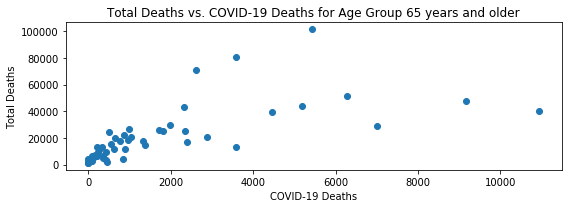

In [53]:
# Scatter Plot Table 1 per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table1.iloc[:,3],tableTD.iloc[:,3])
plt.title("Total Deaths vs. COVID-19 Deaths for Age Group 65 years and older")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs COVID-19 Deaths Scatter Plot 3.png")
plt.show()

In [54]:
# Create tables by State and Age_Group
table2 = pd.pivot_table(Clean4_US_df, values=['Total_Deaths','Pneumonia_and_COVID19_Deaths'], index=['State'], columns=['Age_Group'],aggfunc=np.sum)
table2

Pneumonia_and_COVID19_Deaths              \
Age_Group                              0-54 years 55-64 years   
State                                                           
Alabama                                      15.0        45.0   
Alaska                                        0.0         0.0   
Arizona                                     141.0       195.0   
Arkansas                                      0.0        28.0   
California                                  387.0       534.0   
Colorado                                     30.0        82.0   
Connecticut                                  13.0        74.0   
Delaware                                      0.0        25.0   
District of Columbia                         75.0       102.0   
Florida                                     151.0       226.0   
Georgia                                      81.0       141.0   
Hawaii                                        0.0         0.0   
Idaho                                         0.0         0.0   
Illinois                                    275.0       455.0   
Indiana                                      35.0       140.0   
Iowa                                         12.0        44.0   
Kansas                                        0.0        15.0   
Kentucky                                      0.0        35.0   
Louisiana                                    98.0       207.0   
Maine                                         0.0         0.0   
Maryland                                    100.0       169.0   
Massachusetts                                55.0       242.0   
Michigan                                    198.0       354.0   
Minnesota                                    10.0        42.0   
Mississippi                                  42.0       102.0   
Missouri                                     10.0        30.0   
Montana                                       0.0         0.0   
Nebraska                                      0.0         0.0   
Nevada                                       26.0        57.0   
New Hampshire                                 0.0         0.0   
New Jersey                                  521.0       900.0   
New Mexico                                   22.0        37.0   
New York                                    361.0       682.0   
North Carolina                               29.0        51.0   
North Dakota                                  0.0         0.0   
Ohio                                         41.0       126.0   
Oklahoma                                      0.0        12.0   
Oregon                                        0.0         0.0   
Pennsylvania                                111.0       268.0   
Rhode Island                                  0.0        30.0   
South Carolina                                0.0        55.0   
South Dakota                                  0.0         0.0   
Tennessee                                     0.0        44.0   
Texas                                       179.0       252.0   
Utah                                          0.0        12.0   
Vermont                                       0.0         0.0   
Virginia                                     26.0       103.0   
Washington                                   16.0        71.0   
West Virginia                                 0.0         0.0   
Wisconsin                                     0.0        10.0   
Wyoming                                       0.0         0.0   

                                        Total_Deaths              \
Age_Group            65 years and older   0-54 years 55-64 years   
State                                                              
Alabama                           309.0       3650.0      3897.0   
Alaska                              0.0        345.0       324.0   
Arizona                           993.0       4617.0      4180.0   
Arkansas                           93.0       2174.0      2250.0   
California                       2

In [55]:
table2.describe()

Pneumonia_and_COVID19_Deaths                                 \
Age_Group                   0-54 years 55-64 years 65 years and older   
count                        51.000000   51.000000          51.000000   
mean                         60.000000  117.588235         752.000000   
std                         110.802527  182.691782        1126.631936   
min                           0.000000    0.000000           0.000000   
25%                           0.000000    5.000000          75.000000   
50%                          12.000000   44.000000         309.000000   
75%                          65.000000  140.500000         942.000000   
max                         521.000000  900.000000        5282.000000   

           Total_Deaths                                   
Age_Group    0-54 years   55-64 years 65 years and older  
count         51.000000     51.000000          51.000000  
mean        3465.588235   3577.686275       20684.529412  
std         3623.731862   3595.911253       20933.933367  
min          257.000000    287.000000        1175.000000  
25%          805.000000    918.500000        5821.000000  
50%         2433.000000   2604.000000       15102.000000  
75%         4494.500000   4544.500000       25611.000000  
max        17550.000000  17062.000000      101709.000000

In [56]:
table2.median()

                              Age_Group         
Pneumonia_and_COVID19_Deaths  0-54 years               12.0
                              55-64 years              44.0
                              65 years and older      309.0
Total_Deaths                  0-54 years             2433.0
                              55-64 years            2604.0
                              65 years and older    15102.0
dtype: float64

In [57]:
table2.var()

                              Age_Group         
Pneumonia_and_COVID19_Deaths  0-54 years            1.227720e+04
                              55-64 years           3.337629e+04
                              65 years and older    1.269300e+06
Total_Deaths                  0-54 years            1.313143e+07
                              55-64 years           1.293058e+07
                              65 years and older    4.382296e+08
dtype: float64

In [58]:
table2.sem()

                              Age_Group         
Pneumonia_and_COVID19_Deaths  0-54 years              15.515457
                              55-64 years             25.581966
                              65 years and older     157.760026
Total_Deaths                  0-54 years             507.423956
                              55-64 years            503.528291
                              65 years and older    2931.336997
dtype: float64

In [59]:
# Compute the Pearson correlation coefficient between "Pneumonia and COVID-19 Deaths" and "Total Deaths"
PneumoniaAndCOVID19Deaths = table2.iloc[:,1]
TotalDeath = table2.iloc[:,1]
correlation = states.pearsonr(PneumoniaAndCOVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 0 to 54 years old is {round(correlation[0],2)}")

The correlation between both factors for age group from 0 to 54 years old is 1.0


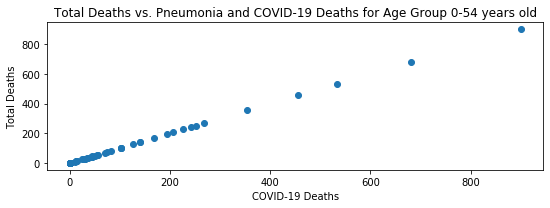

In [60]:
# Scatter Plot Table 2 per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table2.iloc[:,1],table2.iloc[:,1])
plt.title("Total Deaths vs. Pneumonia and COVID-19 Deaths for Age Group 0-54 years old")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs Pneumonia and COVID-19 Deaths Scatter Plot 1.png")
plt.show()

In [61]:
# Compute the Pearson correlation coefficient between "Pneumonia and COVID-19 Deaths" and "Total Deaths"
PneumoniaAndCOVID19Deaths = table2.iloc[:,2]
TotalDeath = table2.iloc[:,2]
correlation = states.pearsonr(PneumoniaAndCOVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 55 to 64 years old is {round(correlation[0],2)}")

The correlation between both factors for age group from 55 to 64 years old is 1.0


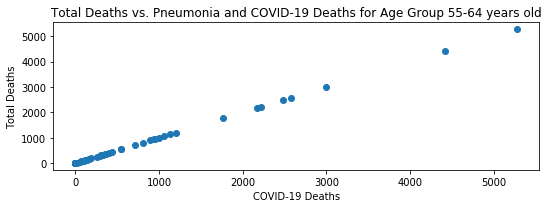

In [62]:
# Scatter Plot Table 2 per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table2.iloc[:,2],table2.iloc[:,2])
plt.title("Total Deaths vs. Pneumonia and COVID-19 Deaths for Age Group 55-64 years old")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs Pneumonia and COVID-19 Deaths Scatter Plot 2.png")
plt.show()

In [63]:
# Compute the Pearson correlation coefficient between "Pneumonia and COVID-19 Deaths" and "Total Deaths"
PneumoniaAndCOVID19Deaths = table2.iloc[:,3]
TotalDeath = table2.iloc[:,3]
correlation = states.pearsonr(PneumoniaAndCOVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 65 years and older is {round(correlation[0],2)}")

The correlation between both factors for age group from 65 years and older is 1.0


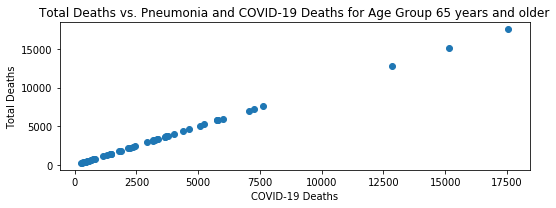

In [64]:
# Scatter Plot Table 2 per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table2.iloc[:,3],table2.iloc[:,3])
plt.title("Total Deaths vs. Pneumonia and COVID-19 Deaths for Age Group 65 years and older")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs Pneumonia and COVID-19 Deaths Scatter Plot 3.png")
plt.show()

In [65]:
# Create tables by State and Age_Group
table3 = pd.pivot_table(Clean4_US_df, values=['Total_Deaths','Pneumonia_Influenza_or_COVID19_Deaths'], index=['State'], columns=['Age_Group'],aggfunc=np.sum)
table3

Pneumonia_Influenza_or_COVID19_Deaths              \
Age_Group                                       0-54 years 55-64 years   
State                                                                    
Alabama                                              253.0       454.0   
Alaska                                                 0.0        10.0   
Arizona                                              421.0       607.0   
Arkansas                                             142.0       221.0   
California                                          1520.0      2064.0   
Colorado                                             196.0       319.0   
Connecticut                                          168.0       391.0   
Delaware                                              33.0        70.0   
District of Columbia                                  91.0       146.0   
Florida                                              799.0      1209.0   
Georgia                                              437.0       666.0   
Hawaii                                                 0.0        35.0   
Idaho                                                  0.0        54.0   
Illinois                                             846.0      1262.0   
Indiana                                              277.0       560.0   
Iowa                                                  70.0       194.0   
Kansas                                                51.0       135.0   
Kentucky                                             186.0       325.0   
Louisiana                                            342.0       571.0   
Maine                                                  0.0        53.0   
Maryland                                             417.0       661.0   
Massachusetts                                        303.0       712.0   
Michigan                                             628.0      1062.0   
Minnesota                                            133.0       267.0   
Mississippi                                          243.0       390.0   
Missouri                                             171.0       321.0   
Montana                                                0.0        27.0   
Nebraska                                              42.0       112.0   
Nevada                                               148.0       202.0   
New Hampshire                                         16.0        51.0   
New Jersey                                          1266.0      2028.0   
New Mexico                                           132.0       138.0   
New York                                             917.0      1747.0   
North Carolina                                       274.0       444.0   
North Dakota                                          16.0        37.0   
Ohio                                                 358.0       674.0   
Oklahoma                                             138.0       294.0   
Oregon                                                60.0       125.0   
Pennsylvania                                         481.0      1005.0   
Rhode Island                                          25.0        95.0   
South Carolina                                       186.0       334.0   
South Dakota                                          24.0        65.0   
Tennessee                                            297.0       481.0   
Texas                                               1151.0      1604.0   
Utah                                                  55.0        91.0   
Vermont                                                0.0         0.0   
Virginia                                             205.0       431.0   
Washington                                           173.0       334.0   
West Virginia                                         47.0       107.0   
Wisconsin                                            133.0       263.0   
Wyoming                                                0.0         0.0   

                        

In [66]:
table3.describe()

Pneumonia_Influenza_or_COVID19_Deaths               \
Age_Group                            0-54 years  55-64 years   
count                                 51.000000    51.000000   
mean                                 271.980392   459.764706   
std                                  343.752789   517.852782   
min                                    0.000000     0.000000   
25%                                   44.500000   101.000000   
50%                                  168.000000   319.000000   
75%                                  322.500000   589.000000   
max                                 1520.000000  2064.000000   

                              Total_Deaths                                   
Age_Group 65 years and older    0-54 years   55-64 years 65 years and older  
count              51.000000     51.000000     51.000000          51.000000  
mean             3075.431373   3465.588235   3577.686275       20684.529412  
std              3505.283933   3623.731862   3595.911253       20933.933367  
min                42.000000    257.000000    287.000000        1175.000000  
25%               623.500000    805.000000    918.500000        5821.000000  
50%              1854.000000   2433.000000   2604.000000       15102.000000  
75%              3859.500000   4494.500000   4544.500000       25611.000000  
max             13167.000000  17550.000000  17062.000000      101709.000000

In [67]:
table3.median()

                                       Age_Group         
Pneumonia_Influenza_or_COVID19_Deaths  0-54 years              168.0
                                       55-64 years             319.0
                                       65 years and older     1854.0
Total_Deaths                           0-54 years             2433.0
                                       55-64 years            2604.0
                                       65 years and older    15102.0
dtype: float64

In [68]:
table3.var()

                                       Age_Group         
Pneumonia_Influenza_or_COVID19_Deaths  0-54 years            1.181660e+05
                                       55-64 years           2.681715e+05
                                       65 years and older    1.228702e+07
Total_Deaths                           0-54 years            1.313143e+07
                                       55-64 years           1.293058e+07
                                       65 years and older    4.382296e+08
dtype: float64

In [69]:
table3.sem()

                                       Age_Group         
Pneumonia_Influenza_or_COVID19_Deaths  0-54 years              48.135018
                                       55-64 years             72.513894
                                       65 years and older     490.837928
Total_Deaths                           0-54 years             507.423956
                                       55-64 years            503.528291
                                       65 years and older    2931.336997
dtype: float64

In [70]:
# Compute the Pearson correlation coefficient between "Pneumonia and COVID-19 Deaths" and "Total Deaths"
PneumoniaAndCOVID19Deaths = table3.iloc[:,1]
TotalDeath = table3.iloc[:,1]
correlation = states.pearsonr(PneumoniaAndCOVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 0 to 54 years old is {round(correlation[0],2)}")

The correlation between both factors for age group from 0 to 54 years old is 1.0


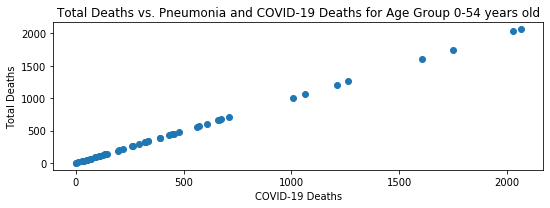

In [71]:
# Scatter Plot Table 3 per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table3.iloc[:,1],table3.iloc[:,1])
plt.title("Total Deaths vs. Pneumonia and COVID-19 Deaths for Age Group 0-54 years old")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs Pneumonia and COVID-19 Deaths Scatter Plot 4.png")
plt.show()

In [72]:
# Compute the Pearson correlation coefficient between "Pneumonia and COVID-19 Deaths" and "Total Deaths"
PneumoniaAndCOVID19Deaths = table3.iloc[:,2]
TotalDeath = table3.iloc[:,2]
correlation = states.pearsonr(PneumoniaAndCOVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 55 to 64 years old is {round(correlation[0],2)}")

The correlation between both factors for age group from 55 to 64 years old is 1.0


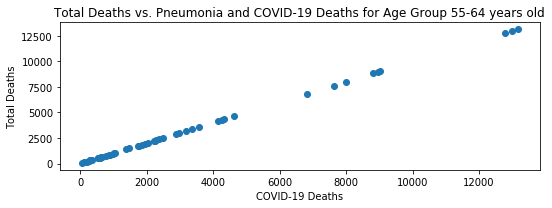

In [73]:
# Scatter Plot Table 3 per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table3.iloc[:,2],table3.iloc[:,2])
plt.title("Total Deaths vs. Pneumonia and COVID-19 Deaths for Age Group 55-64 years old")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs Pneumonia and COVID-19 Deaths Scatter Plot 5.png")
plt.show()

In [74]:
# Compute the Pearson correlation coefficient between "Pneumonia and COVID-19 Deaths" and "Total Deaths"
PneumoniaAndCOVID19Deaths = table3.iloc[:,3]
TotalDeath = table3.iloc[:,3]
correlation = states.pearsonr(PneumoniaAndCOVID19Deaths,TotalDeath)
print(f"The correlation between both factors for age group from 65 years and older is {round(correlation[0],2)}")

The correlation between both factors for age group from 65 years and older is 1.0


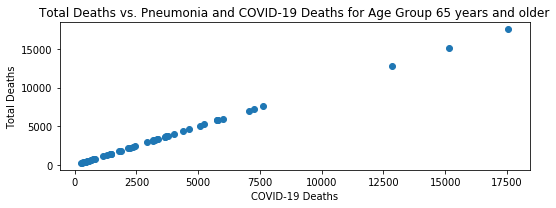

In [75]:
# Scatter Plot Table 3 per Age_Group
plt.figure(figsize=(8, 3))
plt.scatter(table3.iloc[:,3],table3.iloc[:,3])
plt.title("Total Deaths vs. Pneumonia and COVID-19 Deaths for Age Group 65 years and older")
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.savefig("/Users/azpunit/Desktop/Project-1/All Figures/Total Deaths vs Pneumonia and COVID-19 Deaths Scatter Plot 6.png")
plt.show()

In [76]:
# Load in CSV Files
California_df = pd.read_csv("/Users/azpunit/Desktop/Project-1/CSV Files/CALIFORNIA.csv")
California_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Group by: Age,Total Positive,Total Dealth
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-17,25889.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-49,184939.0,446.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50-64,62124.0,1170.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65 and Older,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN


In [77]:
# Delete o drp columns not in use, set header row
New_California_df=California_df.drop(California_df.index[0:7])
New_California_df = New_California_df.reset_index(drop=True)
cols = ['Unnamed: 7','Group by: Age','Total Positive','Total Dealth']
New_California_df.drop(columns=cols,inplace=True)

header_row = 0
New_California_df.columns = New_California_df.iloc[header_row]
New_California_df = New_California_df.drop(header_row)

New_California_df.head()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
1,0-17,120,4/2/2020,NaN,NaN,NaN,NaN
2,18-49,5302,4/2/2020,NaN,NaN,NaN,NaN
3,50-64,2879,4/2/2020,NaN,NaN,NaN,NaN
4,65 and Older,2342,4/2/2020,NaN,NaN,NaN,NaN
5,Missing,58,4/2/2020,NaN,NaN,NaN,NaN


In [78]:
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
# Replace Nan with blank space
Clean_California_df = New_California_df.replace(np.nan, '', regex=True)
Clean_California_df.head()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
1,0-17,120,4/2/2020,,,,
2,18-49,5302,4/2/2020,,,,
3,50-64,2879,4/2/2020,,,,
4,65 and Older,2342,4/2/2020,,,,
5,Missing,58,4/2/2020,,,,


In [79]:
# Delete rows not in use
# If you have multiple values you want to include, put them in a list (or more generally, any iterable) and use isin:
list_of_dates=['4/5/2020','4/12/2020','4/19/2020','4/26/2020','5/3/2020','5/10/2020'
               ,'5/17/2020','5/24/2020','5/31/2020','6/7/2020','6/14/2020','6/21/2020'
               ,'6/28/2020','7/5/2020','7/10/2020']
Weekly_California_df=(Clean_California_df.loc[Clean_California_df['date'].isin(list_of_dates)])
Weekly_California_df.head()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
16,0-17,173,4/5/2020,,,,
17,18-49,7099,4/5/2020,,,,
18,50-64,3884,4/5/2020,,,,
19,65 and Older,3129,4/5/2020,,,,
20,Missing,51,4/5/2020,,,,


In [80]:
# Rename Columns
Weekly_California_df = Weekly_California_df.rename(columns = {"age_group":"Age_Group"})
Weekly_California_df = Weekly_California_df.rename(columns = {"totalpositive":"Cumulative_Positive_PW"})
Weekly_California_df = Weekly_California_df.rename(columns = {"date":"Date"})
Weekly_California_df = Weekly_California_df.rename(columns = {"case_percent":"Case_Percent"})
Weekly_California_df = Weekly_California_df.rename(columns = {"deaths":"Cumulative_Deaths_PW"})
Weekly_California_df = Weekly_California_df.rename(columns = {"deaths_percent":"Deaths_Percent"})
Weekly_California_df = Weekly_California_df.rename(columns = {"ca_percent":"California_Percent"})
Weekly_California_df.head()

,Age_Group,Cumulative_Positive_PW,Date,Case_Percent,Cumulative_Deaths_PW,Deaths_Percent,California_Percent
16,0-17,173,4/5/2020,,,,
17,18-49,7099,4/5/2020,,,,
18,50-64,3884,4/5/2020,,,,
19,65 and Older,3129,4/5/2020,,,,
20,Missing,51,4/5/2020,,,,


In [81]:
# Delete percentage columns
cols = ['Case_Percent','Case_Percent','Deaths_Percent','California_Percent']
Weekly_California_df.drop(columns=cols,inplace=True)
Weekly_California_df.head()

,Age_Group,Cumulative_Positive_PW,Date,Cumulative_Deaths_PW
16,0-17,173,4/5/2020,
17,18-49,7099,4/5/2020,
18,50-64,3884,4/5/2020,
19,65 and Older,3129,4/5/2020,
20,Missing,51,4/5/2020,


In [82]:
# Move Date Column
Date1 = Weekly_California_df['Date']
Weekly_California_df.drop(labels=['Date'], axis=1,inplace = True)
Weekly_California_df.insert(1, 'Date', Date1)
Weekly_California_df.head()

,Age_Group,Date,Cumulative_Positive_PW,Cumulative_Deaths_PW
16,0-17,4/5/2020,173,
17,18-49,4/5/2020,7099,
18,50-64,4/5/2020,3884,
19,65 and Older,4/5/2020,3129,
20,Missing,4/5/2020,51,


In [83]:
# Check data Type of all columns
Weekly_California_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 16 to 500
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age_Group               75 non-null     object
 1   Date                    75 non-null     object
 2   Cumulative_Positive_PW  75 non-null     object
 3   Cumulative_Deaths_PW    75 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB


In [84]:
# Change data Type
Weekly_California_df = Weekly_California_df.astype({'Date':'datetime64'})
Weekly_California_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 16 to 500
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age_Group               75 non-null     object        
 1   Date                    75 non-null     datetime64[ns]
 2   Cumulative_Positive_PW  75 non-null     object        
 3   Cumulative_Deaths_PW    75 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.9+ KB


In [85]:
# Why it doesn't convert to float64???????
Weekly_California_df['Cumulative_Positive_PW'] = pd.to_numeric(Weekly_California_df['Cumulative_Positive_PW'],errors='coerce') 
Weekly_California_df['Cumulative_Deaths_PW'] = pd.to_numeric(Weekly_California_df['Cumulative_Deaths_PW'],errors='coerce') 
Weekly_California_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 16 to 500
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age_Group               75 non-null     object        
 1   Date                    75 non-null     datetime64[ns]
 2   Cumulative_Positive_PW  75 non-null     int64         
 3   Cumulative_Deaths_PW    60 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In [86]:
# Sort by Age_Group
Clean_California_df = Weekly_California_df.sort_values(by=['Age_Group', 'Date'])
Clean_California_df

,Age_Group,Date,Cumulative_Positive_PW,Cumulative_Deaths_PW
16,0-17,2020-04-05,173,NaN
51,0-17,2020-04-12,337,NaN
86,0-17,2020-04-19,573,NaN
121,0-17,2020-04-26,1085,0.0
156,0-17,2020-05-03,1715,0.0
...,...,...,...,...
237,Missing,2020-06-14,206,1.0
405,Missing,2020-06-21,188,1.0
440,Missing,2020-06-28,233,1.0
475,Missing,2020-07-05,308,1.0


In [87]:
# Add a Col
Clean_California_df['State'] = 'California'
Clean_California_df

,Age_Group,Date,Cumulative_Positive_PW,Cumulative_Deaths_PW,State
16,0-17,2020-04-05,173,NaN,California
51,0-17,2020-04-12,337,NaN,California
86,0-17,2020-04-19,573,NaN,California
121,0-17,2020-04-26,1085,0.0,California
156,0-17,2020-05-03,1715,0.0,California
...,...,...,...,...,...
237,Missing,2020-06-14,206,1.0,California
405,Missing,2020-06-21,188,1.0,California
440,Missing,2020-06-28,233,1.0,California
475,Missing,2020-07-05,308,1.0,California


In [88]:
#https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
# Replace Nan with blank space
Clean2_California_df = Clean_California_df.replace(np.nan, '', regex=True)
Clean2_California_df.head()

,Age_Group,Date,Cumulative_Positive_PW,Cumulative_Deaths_PW,State
16,0-17,2020-04-05,173,,California
51,0-17,2020-04-12,337,,California
86,0-17,2020-04-19,573,,California
121,0-17,2020-04-26,1085,0,California
156,0-17,2020-05-03,1715,0,California


In [89]:
# Load in CSV Files
Conneticut_df = pd.read_csv("/Users/azpunit/Desktop/Project-1/CSV Files/CONNETICUT.csv")
Conneticut_df.head()

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Probable cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths
0,4/5/2020,0-9,49,NaN,NaN,13,1,NaN,NaN
1,4/5/2020,10-19,113,NaN,NaN,25,0,NaN,NaN
2,4/5/2020,20-29,639,NaN,NaN,137,0,NaN,NaN
3,4/5/2020,30-39,856,NaN,NaN,194,1,NaN,NaN
4,4/5/2020,40-49,963,NaN,NaN,219,7,NaN,NaN


In [90]:
# https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string
# Replace Nan with blank space
New_Conneticut_df = Conneticut_df.replace(np.nan, '', regex=True)
New_Conneticut_df.head()

,DateUpdated,AgeGroups,Total cases,Confirmed cases,Probable cases,Total case rate,Total deaths,Confirmed deaths,Probable deaths
0,4/5/2020,0-9,49,,,13,1,,
1,4/5/2020,10-19,113,,,25,0,,
2,4/5/2020,20-29,639,,,137,0,,
3,4/5/2020,30-39,856,,,194,1,,
4,4/5/2020,40-49,963,,,219,7,,


In [91]:
# Delete Columns that are not going to be used
cols = ['Confirmed cases','Probable cases','Total case rate','Confirmed deaths', 'Probable deaths']
New_Conneticut_df.drop(columns=cols,inplace=True)
New_Conneticut_df.head()


,DateUpdated,AgeGroups,Total cases,Total deaths
0,4/5/2020,0-9,49,1
1,4/5/2020,10-19,113,0
2,4/5/2020,20-29,639,0
3,4/5/2020,30-39,856,1
4,4/5/2020,40-49,963,7


In [92]:
# Delete rows not in use
# If you have multiple values you want to include, put them in a list (or more generally, any iterable) and use isin:
list_of_dates=['4/5/2020','4/12/2020','4/19/2020','4/26/2020','5/3/2020','5/10/2020'
               ,'5/17/2020','5/24/2020','5/31/2020','6/7/2020','6/14/2020','6/21/2020'
               ,'6/28/2020','7/5/2020','7/10/2020']
Weekly_Conneticut_df=(New_Conneticut_df.loc[New_Conneticut_df['DateUpdated'].isin(list_of_dates)])
Weekly_Conneticut_df.head()

,DateUpdated,AgeGroups,Total cases,Total deaths
0,4/5/2020,0-9,49,1
1,4/5/2020,10-19,113,0
2,4/5/2020,20-29,639,0
3,4/5/2020,30-39,856,1
4,4/5/2020,40-49,963,7


In [93]:
# Check data Type of all columns
Weekly_Conneticut_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 809
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DateUpdated   126 non-null    object
 1   AgeGroups     126 non-null    object
 2   Total cases   126 non-null    int64 
 3   Total deaths  126 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.9+ KB


In [94]:
# Set data type HOW DO I CHANGE IT TO FLOAT 64?????
Weekly_Conneticut_df = Weekly_Conneticut_df.astype({'DateUpdated':'datetime64'})
Weekly_Conneticut_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 809
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateUpdated   126 non-null    datetime64[ns]
 1   AgeGroups     126 non-null    object        
 2   Total cases   126 non-null    int64         
 3   Total deaths  126 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.9+ KB


In [95]:
# Rename Columns
Weekly_Conneticut_df = Weekly_Conneticut_df.rename(columns = {"AgeGroups":"Age_Group"})
Weekly_Conneticut_df = Weekly_Conneticut_df.rename(columns = {"Total cases":"Cumulative_Positive_PW"})
Weekly_Conneticut_df = Weekly_Conneticut_df.rename(columns = {"DateUpdated":"Date"})
Weekly_Conneticut_df = Weekly_Conneticut_df.rename(columns = {"Total deaths":"Cumulative_Deaths_PW"})

Weekly_Conneticut_df.head()

,Date,Age_Group,Cumulative_Positive_PW,Cumulative_Deaths_PW
0,2020-04-05,0-9,49,1
1,2020-04-05,10-19,113,0
2,2020-04-05,20-29,639,0
3,2020-04-05,30-39,856,1
4,2020-04-05,40-49,963,7


In [96]:
# Reorder Columns
Date1 = Weekly_Conneticut_df['Date']
Weekly_Conneticut_df.drop(labels=['Date'], axis=1,inplace = True)
Weekly_Conneticut_df.insert(1, 'Date', Date1)
Weekly_Conneticut_df.head()

,Age_Group,Date,Cumulative_Positive_PW,Cumulative_Deaths_PW
0,0-9,2020-04-05,49,1
1,10-19,2020-04-05,113,0
2,20-29,2020-04-05,639,0
3,30-39,2020-04-05,856,1
4,40-49,2020-04-05,963,7


In [97]:
# Sort by Age_Group
Clean_Conneticut_df = Weekly_Conneticut_df.sort_values(by=['Age_Group', 'Date'])
Clean_Conneticut_df

,Age_Group,Date,Cumulative_Positive_PW,Cumulative_Deaths_PW
0,0-9,2020-04-05,49,1
63,0-9,2020-04-12,89,1
126,0-9,2020-04-19,138,1
189,0-9,2020-04-26,184,1
252,0-9,2020-05-03,226,1
...,...,...,...,...
575,80 and older,2020-06-07,6694,2460
638,80 and older,2020-06-14,6833,2541
701,80 and older,2020-06-21,6828,2553
764,80 and older,2020-06-28,6904,2589


In [98]:
# Add a Col
Clean_Conneticut_df['State'] = 'Conneticut'
Clean_Conneticut_df

,Age_Group,Date,Cumulative_Positive_PW,Cumulative_Deaths_PW,State
0,0-9,2020-04-05,49,1,Conneticut
63,0-9,2020-04-12,89,1,Conneticut
126,0-9,2020-04-19,138,1,Conneticut
189,0-9,2020-04-26,184,1,Conneticut
252,0-9,2020-05-03,226,1,Conneticut
...,...,...,...,...,...
575,80 and older,2020-06-07,6694,2460,Conneticut
638,80 and older,2020-06-14,6833,2541,Conneticut
701,80 and older,2020-06-21,6828,2553,Conneticut
764,80 and older,2020-06-28,6904,2589,Conneticut
